# plotting timeseries and identified events

In [10]:
for n=1:length(BEGINNING_RAIN)
    index_start_rain(n)=find(time==BEGINNING_RAIN(n));
    index_finish_rain(n)=find(time==END_RAIN(n));
    index_start_flow(n)=find(time==BEGINNING_FLOW(n));
    index_finish_flow(n)=find(time==END_FLOW(n));
end

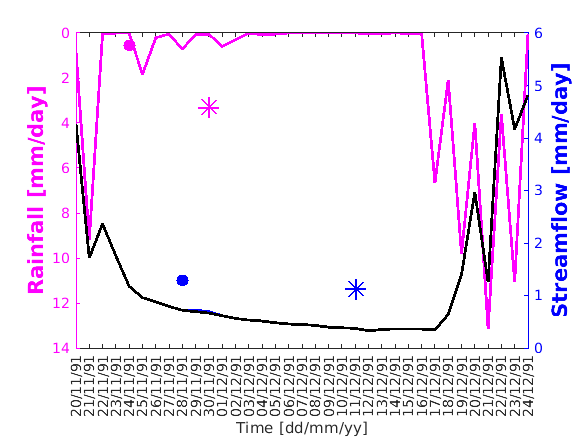

fig = 
   <a href="matlab:helpPopup matlab.ui.Figure" style="font-weight:bold">Figure</a> (3) with properties:

      Number: 3
        Name: ''
       Color: [1 1 1]
    Position: [508 656 583 437]
       Units: 'pixels'

  Show <a href="matlab:if exist('fig', 'var'), matlab.graphics.internal.getForDisplay('fig', fig, 'matlab.ui.Figure'), else, matlab.graphics.internal.getForDisplay('fig'), end">all properties</a>

In [11]:
fig=figure %创建空白图形窗口，并展示出来
left_color = [255,0,255]./256; %向量中三个元素分别表示红绿蓝，0-1表示颜色的程度
right_color =[0,0,255]./256;
set(fig,'defaultAxesColorOrder',[left_color; right_color]);
yyaxis left %将当前绘图环境切换到左侧y轴
%'-m'表示绘制线条颜色为品红色（magenta）且为实线，'LineWidth', 2表示线条宽度为2
plot(time, rain_original(689:723,7), '-m', 'LineWidth', 2)
hold on %保持绘图环境，使得之后绘制的图像在同一个图形窗口中显示
%开始下雨通常是在雨量开始与零不同时设置的，但我们认识到从零雨量开始的视觉效果更好，因此"-1"
%结束雨量通常是在雨量与零不同的最后一个时间步长时设置的，但我们认识到从视觉上看，以零雨量结束会更好，因此是 "+1" 
plot(time(index_start_rain-1),rain_original(index_start_rain-1,7),'.m', 'MarkerSize', 30); 
plot(time(index_finish_rain+1),rain_original(index_finish_rain+1,7),'*m','MarkerSize', 15, 'LineWidth', 2); 
% 'MarkerSize', 30表示标记大小为30个像素点；'.m'表示标记颜色为品红色且为点状，'*m'表示标记颜色为品红色且为星形状

yyaxis right
plot(time, flow_original(689:723,7), '-b', 'LineWidth', 2)
plot(time, baseflow_original, '-k', 'LineWidth', 2)
hold on
plot(time(index_start_flow),flow_original(index_start_flow,7),'.b', 'MarkerSize', 30);
plot(time(index_finish_flow),flow_original(index_finish_flow,7),'*b', 'MarkerSize', 15,'LineWidth', 2);

% legend( 'rainfall', 'beg rain DMCA-ESR', 'end rain DMCA-ESR','streamflow', 'baseflow DMCA-ESR' , 'beg flow DMCA-ESR', 'end flow DMCA-ESR')
ax = gca;
ax.YAxis(1).Direction = 'reverse';
set(gca, 'XTick', time(1:1:end));
datetick('x','dd/mm/yy','keepticks');
box on
yyaxis right
ylabel('Streamflow [mm/day]','FontSize',15, 'FontWeight', 'Bold')
yyaxis left
ylabel('Rainfall [mm/day]', 'FontSize',15, 'FontWeight', 'Bold')
xlabel ('Time [dd/mm/yy]')
box on

- legend函数在图例中添加了不同曲线的标签，便于区分。
- 